# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def dice_roll():
    diceroll_lst =[]
    n = [1, 2, 3, 4, 5, 6]
    for i in range(10):
        diceroll_lst.append(np.random.choice(n))
    diceroll_df = pd.DataFrame(diceroll_lst, columns = ['dice_value'])
    return diceroll_df

dice_roll()

,dice_value
0,4
1,1
2,5
3,6
4,3
5,5
6,4
7,3
8,4
9,6


#### 2.- Plot the results sorted by value.

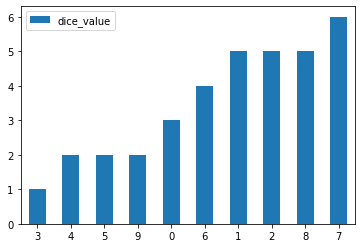

In [3]:
# your code here
dice_df = dice_roll()
df_sorted = dice_df.sort_values(by=['dice_value'])
df_sorted.plot.bar(rot=0)
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

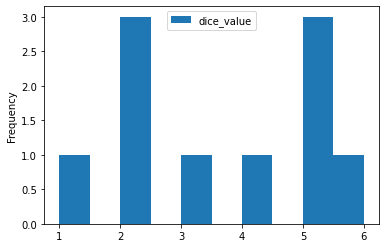

In [4]:
# your code here
df_sorted.plot.hist()
plt.show()

In [5]:
"""
Both plots show the frequency of each value. In the first plot, the dice's value for each try. 
In the second plot, the number of times each dice's value appeared. 

"""

"\nBoth plots show the frequency of each value. In the first plot, the dice's value for each try. \nIn the second plot, the number of times each dice's value appeared. \n\n"

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here
def mean_value(x):
    return np.sum(x)/len(x)

mean_value(dice_df['dice_value'])

3.5

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here

frequency_dist = pd.DataFrame(dice_df['dice_value'].value_counts()).reset_index()
frequency_dist.rename(columns = {'index': 'dice_value', 'dice_value': 'frequency'}, inplace = True)

mean = np.sum(frequency_dist['dice_value'] * frequency_dist['frequency'])/np.sum(frequency_dist['frequency'])

print(frequency_dist)
print('the mean value is', mean)

   dice_value  frequency
0           5          3
1           2          3
2           6          1
3           4          1
4           3          1
5           1          1
the mean value is 3.5


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [8]:
# your code here

def median(df, col):
    df = df.sort_values(col)
    middle_index = int((len(df[col])) / 2)
    if len(df[col]) % 2 == 0:
        return (middle_index + (middle_index -1)) / 2
    else:
        return middle_index

median(dice_df, 'dice_value')

4.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [9]:
# your code here
def quartiles (df, col):
    df = df.sort_values(col)
    Q1 = df.iloc[int(len(df[col])/4)][col]
    Q2 = median(df, col)
    Q3 = df.iloc[-int(len(df[col])/4)][col]
    return print([Q1, Q2, Q3])

quartiles(dice_df, 'dice_value')
dice_df['dice_value'].sort_values()

[2, 4.5, 5]


3    1
4    2
5    2
9    2
0    3
6    4
1    5
2    5
8    5
7    6
Name: dice_value, dtype: int64

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from [here](https://drive.google.com/file/d/1mDz-pl6Dpp0fvrXqkFTosuaW3mw6tfWP/view?usp=sharing), place it in the `data` folder and load it
#### 1.- Sort the values and plot them. What do you see?

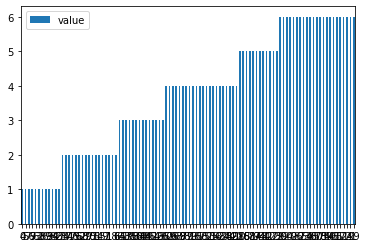

In [10]:
# your code here
dice_hundred = pd.read_csv('../data/roll_the_dice_hundred.csv')
dice_hundred_sorted = dice_hundred.sort_values(by='value', ascending=True)
dice_hundred_sorted.plot.bar(y='value', rot=0)
plt.show()

In [11]:
""" 
6 was thrown more times and 5 was thrown less times.

"""

' \n6 was thrown more times and 5 was thrown less times.\n\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [12]:
# your code here
mean_value(dice_hundred['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [13]:
# your code here
dice_hundred_freq = pd.DataFrame(dice_hundred['value'].value_counts())
dice_hundred_freq.reset_index(inplace = True)
dice_hundred_freq.rename(columns = {'index': 'value', 'value': 'frequency'}, inplace = True)
dice_hundred_freq_sorted = dice_hundred_freq.sort_values(by = ['value'])
dice_hundred_freq_sorted.head(6)

,value,frequency
5,1,12
2,2,17
3,3,14
1,4,22
4,5,12
0,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

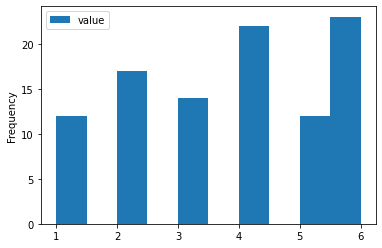

In [14]:
# your code here
dice_hundred.plot.hist(y = 'value')
plt.show()

In [15]:
"""
1 and 5 are the least frequent numbers.
4 and 6 are the most frequent numbers. The mean is 3.74, towards the high side.

"""

'\n1 and 5 are the least frequent numbers.\n4 and 6 are the most frequent numbers. The mean is 3.74, towards the high side.\n\n'

#### 5 Read the `roll_the_dice_thousand.csv` from <br> 
[here](https://drive.google.com/file/d/1zYzEcKL1tA69WCACG8WhTEr7m9fojClZ/view?usp=sharing), place it in the `data` folder and load it. 
Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

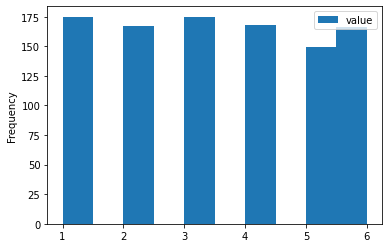

In [16]:
# your code here
dice_thousand = pd.read_csv('../data/roll_the_dice_thousand.csv')
dice_thousand = dice_thousand.sort_values(by=['value'], ascending=True)
dice_thousand.plot.hist(y = 'value')
plt.show()

In [17]:
"""
The frequencies are more similar. The sample is bigger which 
can help to increase similarity.

"""

'\nThe frequencies are more similar. The sample is bigger which \ncan help to increase similarity.\n\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`

from [here](https://drive.google.com/file/d/1sHr5-fnvn9oBvxu3tlR4ANCnQHDV-bUc/view?usp=sharing), place it in the data folder and load it. <br>
Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

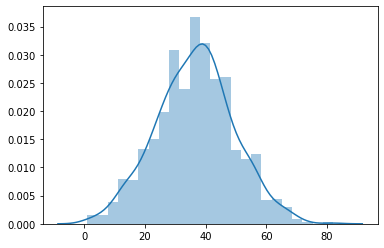

In [18]:
# your code here
ages_df = pd.read_csv('../data/ages_population.csv')
sns.distplot(ages_df)
plt.show()
#Aline: I'd guess the mean between 35-40 and the standard deviation between 20-30.

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [19]:
# your code here
print(ages_df['observation'].mean())
print(ages_df['observation'].std())

36.56
12.81649962597677


In [20]:
"""
The mean fall within the range but the standard deviation is smaller than expected.

"""

'\nThe mean fall within the range but the standard deviation is smaller than expected.\n\n'

#### 3.- Now read the file `ages_population2.csv` 
from [here](https://drive.google.com/file/d/1RWGflLnwLOgZICUnrc9COzj3qcUeJP0X/view?usp=sharing) place it in the data folder and load it.  Calculate the frequency distribution and plot it.

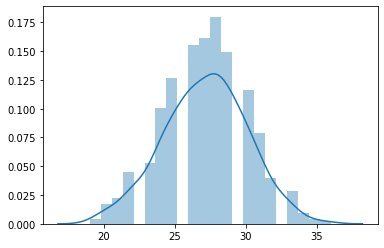

In [21]:
# your code here
ages_df2 = pd.read_csv('../data/ages_population2.csv')
sns.distplot(ages_df2)
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [22]:
"""
It's less normally distributed than the frequency distribution in step 1.
"""

"\nIt's less normally distributed than the frequency distribution in step 1.\n"

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [23]:
# your code here
print(ages_df2['observation'].mean())
print(ages_df2['observation'].std())

27.155
2.9698139326891835


In [24]:
"""
Lower mean and the smaller standard deviation.
"""

'\nLower mean and the smaller standard deviation.\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv` 
from [here](https://drive.google.com/file/d/1knUGLeVUADYUXYqq_Ap48oTtLKkjHCNv/view?usp=sharing) and place it in the data folder. Calculate the frequency distribution and plot it.

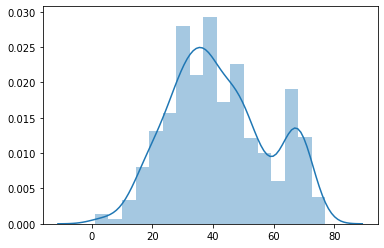

In [25]:
# your code here
ages_df3 = pd.read_csv('../data/ages_population3.csv')
#ages_df3.plot.hist()
sns.distplot(ages_df3)
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [26]:
# your code here
print(ages_df3['observation'].mean())
print(ages_df3['observation'].std())

41.989
16.14470595986593


In [27]:
""" 
The standard deviation larger than previous plots.
In the histogram there is a peak between 30-40 (first curve) and another one between 60-70 y/o 
which would explain the large standard deviation. 

"""

' \nThe standard deviation larger than previous plots.\nIn the histogram there is a peak between 30-40 (first curve) and another one between 60-70 y/o \nwhich would explain the large standard deviation. \n\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [28]:
# your code here
print(ages_df3['observation'].quantile(0.25))
print(ages_df3['observation'].quantile(0.50))
print(ages_df3['observation'].quantile(0.75))

30.0
40.0
53.0


In [29]:
"""
The mean is a bit higher than median. 
The median is closer to the first quartile than it is from 
the third quartile due to the spike in frequency for ages 60-70.

"""

'\nThe mean is a bit higher than median. \nThe median is closer to the first quartile than it is from \nthe third quartile due to the spike in frequency for ages 60-70.\n\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [30]:
# your code here
print(ages_df3['observation'].quantile(0.80))
print(ages_df3['observation'].quantile(0.85))
print(ages_df3['observation'].quantile(0.90))

57.0
64.0
67.0


In [31]:
"""
The first curve is represented by approx. 85% of the data. 

"""

'\nThe first curve is represented by approx. 85% of the data. \n\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [32]:
# your code here

In [33]:
"""
your comments here
"""

'\nyour comments here\n'